<a href="https://colab.research.google.com/github/epogrebnyak/weo-reader/blob/master/weo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade git+https://github.com/epogrebnyak/weo-reader.git 
#!pip install weo

In [0]:
import os
from weo import download, WEO

path = 'weo.csv'
if not os.path.exists(path):
  download(path, 2019, 2)
w = WEO(path)

In [0]:
w.country('DEU', 2018)

,2018,Variable
,,
NGDP,3344.370,"Gross domestic product, current prices - Natio..."
NGDPD,3951.340,"Gross domestic product, current prices - U.S. ..."
NGDP_RPCH,1.522,"Gross domestic product, constant prices - Perc..."
PCPIEPCH,1.751,"Inflation, end of period consumer prices - Per..."
PCPIPCH,1.927,"Inflation, average consumer prices - Percent c..."
LP,82.903,Population - Persons
LUR,3.400,Unemployment rate - Percent of total labor force
GGR,1552.924,General government revenue - National currency
GGX,1490.498,General government total expenditure - Nationa...


In [87]:
w.find_countries('MAL')

,WEO Country Code,ISO,Country
3015,258,GTM,Guatemala
4635,676,MWI,Malawi
4680,548,MYS,Malaysia
4725,556,MDV,Maldives
4770,678,MLI,Mali
4815,181,MLT,Malta
7020,726,SOM,Somalia


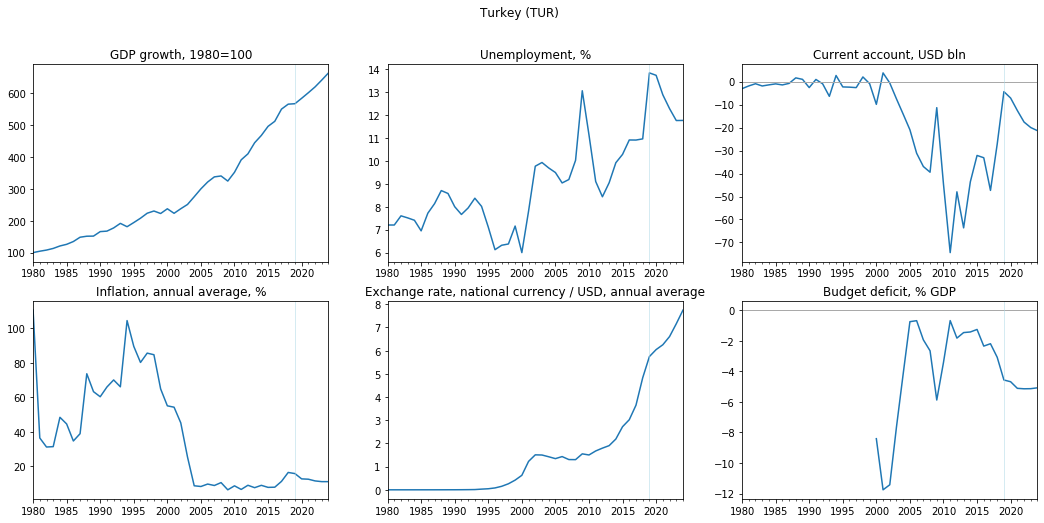

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12*3/2,8))

iso_code = 'TUR'
c = w.country(iso_code)

df = pd.DataFrame()
df['_GDP'] = (c.NGDP_RPCH/100+1).cumprod().div(c.NGDP_RPCH['1980']/100+1)*100
df['_FX'] = c.NGDP / c.NGDPD
df['_DEFICIT'] = (c.GGR - c.GGX) / c.NGDP * 100

df._GDP.plot(ax=axes[0,0], title='GDP growth, 1980=100') # add per capita
c.LUR.plot(ax=axes[0,1], title='Unemployment, %')
c.PCPIPCH.plot(ax=axes[1,0], title='Inflation, annual average, %') # can draw deflator too here
df._FX.plot(ax=axes[1,1], title='Exchange rate, national currency / USD, annual average') # this is 1 for the US
c.BCA.plot(ax=axes[0,2], title="Current account, USD bln").axhline(y=0, ls='-', lw=1, color='darkgrey')
df._DEFICIT.plot(ax=axes[1,2], title="Budget deficit, % GDP").axhline(y=0, ls='-', lw=1, color='darkgrey')

fig.suptitle(w.country_name(iso_code) + f' ({iso_code})')

for row in axes:
  for ax in row:
    ax.axvline(x='2019', ls='-', lw=0.5, color='lightblue')

plt.savefig(iso_code+'.png')    